In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='4d19f1c5-7328-4593-8523-257a08a74f8f', project_access_token='p-f4d5d78e734228858de7318cd695e34dbbfe9879')
pc = project.project_context

# Segmenting and Clustering Neighborhoods in Toronto

## Question 1: Scrape Wikipedia Webpage List of Toronto Postal Codes
### Here a table containing a list of Toronto postal codes from a Wikipedia webpage is scraped using BeautifulSoup and then converted into a dataframe.

In [2]:
!pip install beautifulsoup4
!pip install lxml
!pip install requests
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
import requests # library to handle requests
from bs4 import BeautifulSoup

In [3]:
#scrape data and convert into dataframe
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source,'lxml')
table=soup.find('table')
table_rows = table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td]
    l.append(row)
    
TorontoZips = pd.DataFrame(l, columns=["PostalCode", "Borough", "Neighborhood"])
TorontoZips.drop(TorontoZips.index[0], inplace=True)
NotAssigned= TorontoZips[(TorontoZips['Borough']=='Not assigned') ].index
TorontoZips =TorontoZips.drop(NotAssigned)
TorontoZips.reset_index(drop=True, inplace=True)
TorontoZips

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [4]:
TorontoZips.shape

(103, 3)

## Question 2: Toronto Area Geospatial Coordinates
### Obtain a list of Toronto area geospatial coordinates by postal code.  A dataframe is created which is then merged to the dataframe from question one.

In [5]:
#import pandas as pd
#Fetch the file
file = project.get_file("Geospatial_Coordinates.csv")

df=pd.read_csv(file)
df

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [6]:
# Merge Neighborhood dataframe and geosptial dataframe
Zips=TorontoZips.merge(df, left_on='PostalCode', right_on='Postal Code')
Zips=Zips.filter(['PostalCode','Borough','Neighborhood','Latitude','Longitude'], axis=1)
Zips

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


## Question 3: Clustering Downtown Toronto

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [182]:
sub ='Downtown Toronto'
Zips["Indexes"]= Zips["Borough"].str.find(sub) 
is_Toronto =  Zips['Indexes']!=-1
Zips_Toronto =  Zips[is_Toronto].reset_index(drop=True) 

map_Toronto = folium.Map(location=[43.653225, -79.383186], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(Zips_Toronto['Latitude'], Zips_Toronto['Longitude'], Zips_Toronto['Borough'], Zips_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [84]:
# @hidden_cell
CLIENT_ID = '2PZGGUE5VDF05HTWQKFHPZCS3IF2K0UPLFCHE1TCBNU2H2SL' # your Foursquare ID
CLIENT_SECRET = 'K3VSCPD4ZK3HVF1NPID5UBDBMXBN45WTMUWAZANDLGNIRFYG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
ACCESS_TOKEN = 'FCE2VLM2KJ10JJECPXXN1TQACGAIS4CAZJ1UNOXS1EEQKGXO'

In [103]:
Zips_Toronto=Zips_Toronto[['Borough','Neighborhood','Latitude','Longitude']]
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [104]:
toronto_venues = getNearbyVenues(names=Zips_Toronto['Neighborhood'],
                                   latitudes=Zips_Toronto['Latitude'],
                                   longitudes=Zips_Toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [154]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

There are 204 uniques categories.


In [155]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.shape

(19, 204)

In [156]:
# a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Restaurant,Cheese Shop,Café,Jazz Club,Beach
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Boat or Ferry,Coffee Shop
2,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Ice Cream Shop,Japanese Restaurant,Thai Restaurant,Salad Place,Bubble Tea Shop,Bar
3,Christie,Grocery Store,Café,Park,Baby Store,Coffee Shop,Nightclub,Diner,Italian Restaurant,Candy Store,Restaurant
4,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Coffee Shop,Restaurant,Yoga Studio,Café,Men's Store,Mediterranean Restaurant,Hotel,Gay Bar


In [166]:
#Run k-means to cluster the neighborhood.
# import k-means from clustering stage
from sklearn.cluster import KMeans
inertia=[]
# set number of clusters
kclusters = range(1,6)

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
for k in kclusters:
    kmeans = KMeans(n_clusters=k, random_state=0,init="k-means++", n_init=12).fit(toronto_grouped_clustering)
    inertia.append(kmeans.inertia_)
# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 3, 4, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int32)

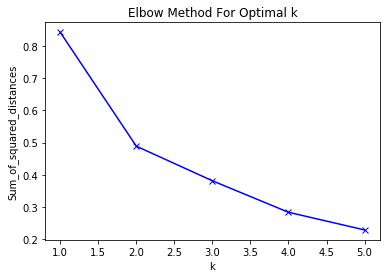

In [167]:
import matplotlib.pyplot as plt
plt.plot(kclusters, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [170]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = Zips_Toronto
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged['Cluster Labels'] =toronto_merged['Cluster Labels'].astype(int)
toronto_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Breakfast Spot,Pub,Café,Theater,Yoga Studio,Mexican Restaurant,Restaurant
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,College Cafeteria,Gym,Diner,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Hobby Shop
2,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Cosmetics Shop,Café,Restaurant,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Lingerie Store
3,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Cocktail Bar,Gastropub,American Restaurant,Gym,Seafood Restaurant,Restaurant,Italian Restaurant,Department Store
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Restaurant,Cheese Shop,Café,Jazz Club,Beach
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Ice Cream Shop,Japanese Restaurant,Thai Restaurant,Salad Place,Bubble Tea Shop,Bar
6,Downtown Toronto,Christie,43.669542,-79.422564,2,Grocery Store,Café,Park,Baby Store,Coffee Shop,Nightclub,Diner,Italian Restaurant,Candy Store,Restaurant
7,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Hotel,Clothing Store,Deli / Bodega,Bookstore,Steakhouse
8,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Brewery,Sporting Goods Shop,Restaurant,Fried Chicken Joint,Italian Restaurant
9,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0,Coffee Shop,Café,Hotel,Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Salad Place,American Restaurant,Steakhouse


In [171]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
bestK=4
# create map
map_clusters = folium.Map(location=[43.653225, -79.383186], zoom_start=12)

# set color scheme for the clusters
x = np.arange(bestK)
ys = [i + x + (i*x)**2 for i in range(bestK)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster-3)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [177]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",Coffee Shop,Bakery,Park,Breakfast Spot,Pub,Café,Theater,Yoga Studio,Mexican Restaurant,Restaurant
2,"Garden District, Ryerson",Clothing Store,Coffee Shop,Bubble Tea Shop,Cosmetics Shop,Café,Restaurant,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Lingerie Store
3,St. James Town,Café,Coffee Shop,Cocktail Bar,Gastropub,American Restaurant,Gym,Seafood Restaurant,Restaurant,Italian Restaurant,Department Store
4,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Restaurant,Cheese Shop,Café,Jazz Club,Beach
7,"Richmond, Adelaide, King",Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Hotel,Clothing Store,Deli / Bodega,Bookstore,Steakhouse
8,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Brewery,Sporting Goods Shop,Restaurant,Fried Chicken Joint,Italian Restaurant
9,"Toronto Dominion Centre, Design Exchange",Coffee Shop,Café,Hotel,Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Salad Place,American Restaurant,Steakhouse
10,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Deli / Bodega
11,"University of Toronto, Harbord",Café,Bookstore,Bar,Italian Restaurant,Japanese Restaurant,Bakery,Restaurant,Yoga Studio,Beer Bar,College Gym
12,"Kensington Market, Chinatown, Grange Park",Café,Mexican Restaurant,Vietnamese Restaurant,Dessert Shop,Bakery,Coffee Shop,Bar,Gaming Cafe,Vegetarian / Vegan Restaurant,Hotel Bar


In [179]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Rosedale,Park,Trail,Playground,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


In [180]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Christie,Grocery Store,Café,Park,Baby Store,Coffee Shop,Nightclub,Diner,Italian Restaurant,Candy Store,Restaurant


In [181]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Boat or Ferry,Coffee Shop


## Results
### I segmented and clustered Downtown Toronto.  I found the optimal K was four.  Cluster 0 called Dining has mostly Cafes, Restaurants and Bars. Cluster 1 called Outdoors has mostly Parks, Trails and Playgrounds. Cluster 2 called Shopping has Grocery stores, as well as, Baby and Candy Stores. Cluster 4 called Airport and Marina has mostly Airport and Marina related venues. 